# Feed forward neural networks

### Case: automatic mail-delivery

One of the precursors to more advanced networks and tasks is to consider the recognition of handwriting. More specifically, can you train a network to distinguish the digits 0-9? This was one of the earliest practical applications for neural networks, and we will go through it here.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
cm = plt.cm.gray_r

In [29]:
data = sklearn.datasets.load_digits()
X = data.images
y = data.target

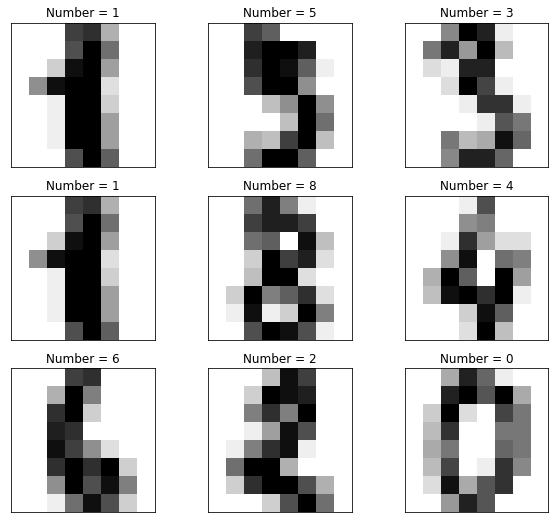

In [44]:
fig = plt.figure(figsize=(10,9))

for i in range(9):
    
    ax = fig.add_subplot(3,3,i+1)
    i = np.random.randint(0,10)
    img = data.images[i,:,:]
    plt.imshow(img, cmap=cm)
    plt.xticks([]); plt.yticks([])
    plt.title(f'Number = {i}')

#### Whenever a machine learning model is trained, we first have to split our data into train data and test data.

In [59]:
X = X.reshape(1797, 64)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Making a machine learning model. 
When we make an algorithm, we treat the model as an object. When instantiated, we also define the network architecture, by entering them as parameters. For example, to construct a neural network with 2 hidden layers, 50 neurons in each layer, we do the following. Most other parameter choices are done behind the scenes by default.

In [61]:
clf = MLPClassifier(hidden_layer_sizes=(50,50))

We say that `clf` is an instance of the the object, MLPClassifier. We can check this with the `type` command.

In [62]:
#### find what type clf has

#### Each machine learning model in scikit-learn has a set of associated methods. The most important ones are `fit` and `predict`. The first is equivalent of training.

In [63]:
X_train.shape

(1347, 64)

In [64]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

#### Now that the model has been trained, we can try to make a prediction on a few unseen samples. You can rerun this very code a few times, and confirm that the network indeed has been properly trained with a high accuracy!

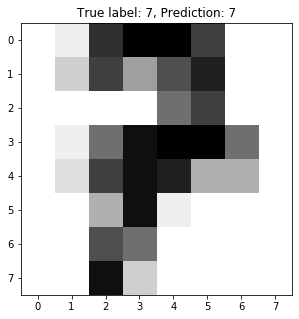

In [130]:
i = np.random.randint(0,10)
img = X_test[i].reshape(8,8) #we need to redo the flatten operation 
pred = clf.predict([X_test[i]])[0]

plt.figure(figsize=(5,5))
plt.imshow(img, cmap=cm)
plt.title(f'True label: {y_test[i]}, Prediction: {pred}')
plt.show()

To get a more proper quantification of the model, we can compute the accuracy: the relationship between the correct predictions and the total number of predictions:

$$ Accuracy = \frac{TP}{TP + FP}$$

In [135]:
accuracy = clf.score(X_test, y_test)

print(f'The model has a test accuracy of {round(accuracy,2)} and a train accuracy of {clf.score(X_train,y_train)}')

The model has a test accuracy of 0.97 and a train accuracy of 1.0


As you can see, the train accuracy is overly optimistic, with a perfect prediction score - this is known as overfitting - the model memorizes specific instances at the cost of generlization. However, this degree of overfitting seen here is not very severe. 

#### Summary so far: with only about 2 lines of code, you can make a neural net, train it on a dataset, and evaluate its performance